<a href="https://colab.research.google.com/github/a-0yahya/Portfolio_A.Y/blob/main/Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U accelerate
!pip install -U transformers

In [8]:
!pip install --upgrade transformers

In [10]:
!pip uninstall -y transformers
!pip install accelerate -U


Found existing installation: transformers 4.50.0
Uninstalling transformers-4.50.0:
  Successfully uninstalled transformers-4.50.0
  Using cached transformers-4.50.0-py3-none-any.whl.metadata (39 kB)
Using cached transformers-4.50.0-py3-none-any.whl (10.2 MB)


In [1]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict
import gdown

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
from torch.optim import AdamW


In [6]:
file_id = "1byKeRJkE5IIf4-AsTVJd0o0E3yYngCQg"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"
gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1byKeRJkE5IIf4-AsTVJd0o0E3yYngCQg
To: /content/data.csv
100%|██████████| 691k/691k [00:00<00:00, 111MB/s]


In [7]:
df

,Reviews,BATTERY,PERFORMANCE,CAMERA,DISPLAY,PRICE,MULTIMEDIA,FITNESS & HEALTH TRACKING,CUSTOMIZATION
0,Porfomance quality sound quality and value for...,0,1,0,0,1,1,0,0
1,This is my th Xiaomi mobile and absolutely LOV...,0,1,0,0,1,0,0,0
2,Really loved the design very fast charging I A...,1,0,0,0,0,0,0,1
3,The truth wa very good the package arrived a d...,1,1,0,0,0,0,0,0
4,My order arrived on time the person who made t...,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2243,This is my first Apple Watch and needless to s...,1,0,0,0,1,0,0,1
2244,it got a brilliant battery life which is most ...,1,0,0,0,1,0,1,1
2245,This is the second watch face cover I have rec...,0,0,0,1,0,0,0,1
2246,Bezel is a perfect fit for the Ultra provides ...,0,0,0,0,0,0,0,1


In [8]:
emotion_columns = ['BATTERY', 'PERFORMANCE', 'CAMERA', 'DISPLAY', 'PRICE', 'MULTIMEDIA', 'FITNESS & HEALTH TRACKING',
                   'CUSTOMIZATION']

In [9]:
df[emotion_columns] = df[emotion_columns].astype(int)

In [10]:
df

,Reviews,BATTERY,PERFORMANCE,CAMERA,DISPLAY,PRICE,MULTIMEDIA,FITNESS & HEALTH TRACKING,CUSTOMIZATION
0,Porfomance quality sound quality and value for...,0,1,0,0,1,1,0,0
1,This is my th Xiaomi mobile and absolutely LOV...,0,1,0,0,1,0,0,0
2,Really loved the design very fast charging I A...,1,0,0,0,0,0,0,1
3,The truth wa very good the package arrived a d...,1,1,0,0,0,0,0,0
4,My order arrived on time the person who made t...,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2243,This is my first Apple Watch and needless to s...,1,0,0,0,1,0,0,1
2244,it got a brilliant battery life which is most ...,1,0,0,0,1,0,1,1
2245,This is the second watch face cover I have rec...,0,0,0,1,0,0,0,1
2246,Bezel is a perfect fit for the Ultra provides ...,0,0,0,0,0,0,0,1


In [11]:
df.to_csv('data_prep_emotion_multilabel_ExtendChatGPT.csv', index=False)

In [12]:
emotion_counts = df[emotion_columns].sum()

In [13]:
import matplotlib.pyplot as plt

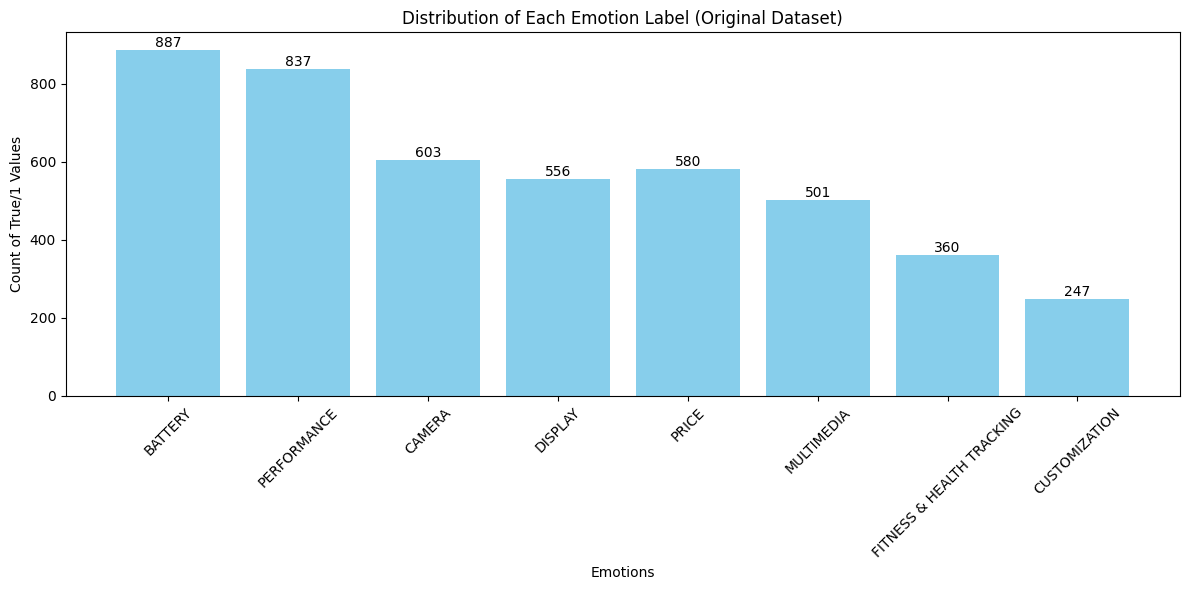

In [14]:
emotion_counts = df.iloc[:, 1:].sum()  # Menghitung jumlah nilai True/1 untuk setiap label emosi

plt.figure(figsize=(12, 6))
bars = plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')

# Tambahkan label jumlah di atas setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Each Emotion Label (Original Dataset)')
plt.xlabel('Emotions')
plt.ylabel('Count of True/1 Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
# split into train and test
df_train, df_test = train_test_split(df, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [16]:
df_train.to_csv('data_train_emotion.csv', index=False)
df_test.to_csv('data_test_emotion.csv', index=False)
df_valid.to_csv('data_valid_emotion.csv', index=False)

In [17]:
def plot_emotion_distribution(df, title):
    emotion_counts = df.iloc[:, 1:].sum()  # Menghitung jumlah nilai True/1 untuk setiap label emosi

    plt.figure(figsize=(12, 6))
    bars = plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')

    # Tambahkan label jumlah di atas setiap batang
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribution of Each Emotion Label ({title})')
    plt.xlabel('Emotions')
    plt.ylabel('Count of True/1 Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

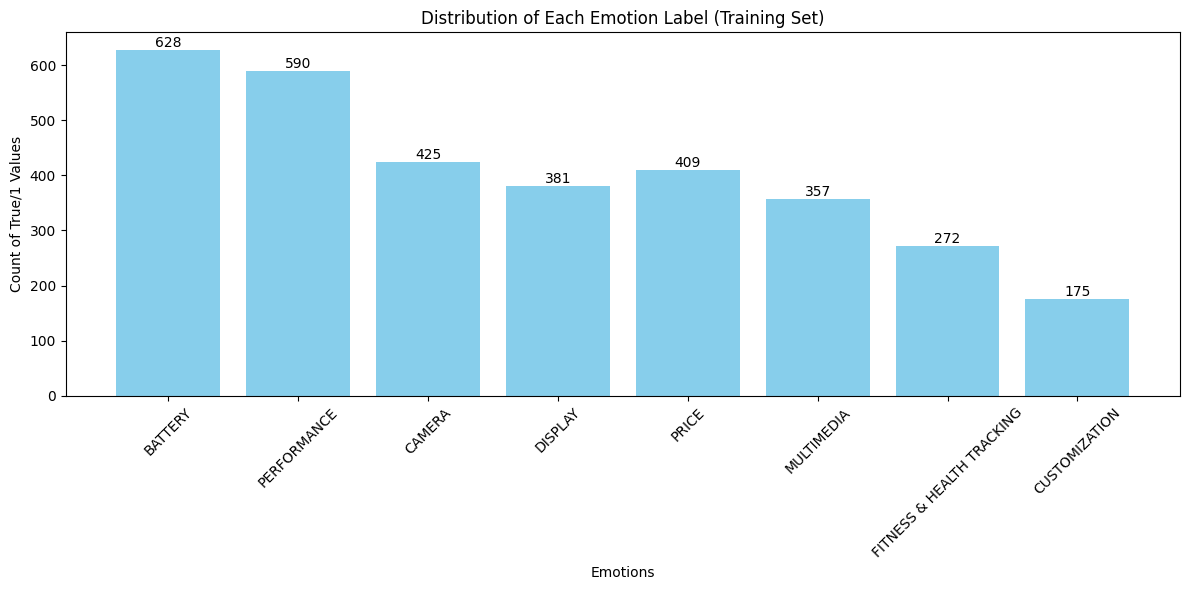

In [18]:
plot_emotion_distribution(df_train, 'Training Set')

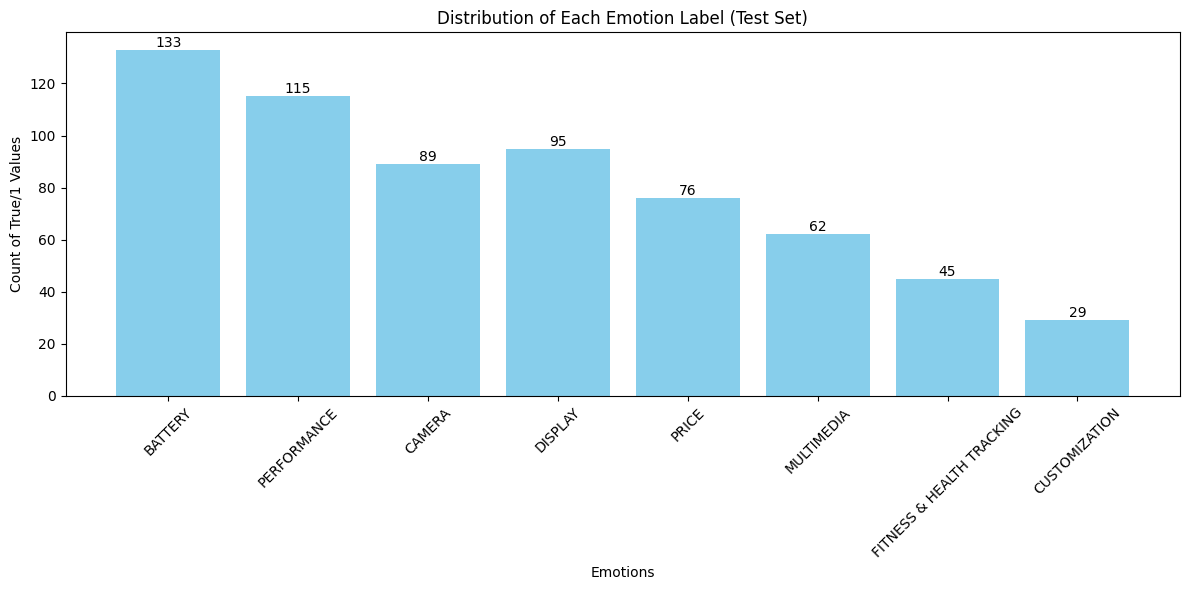

In [19]:
plot_emotion_distribution(df_test, 'Test Set')

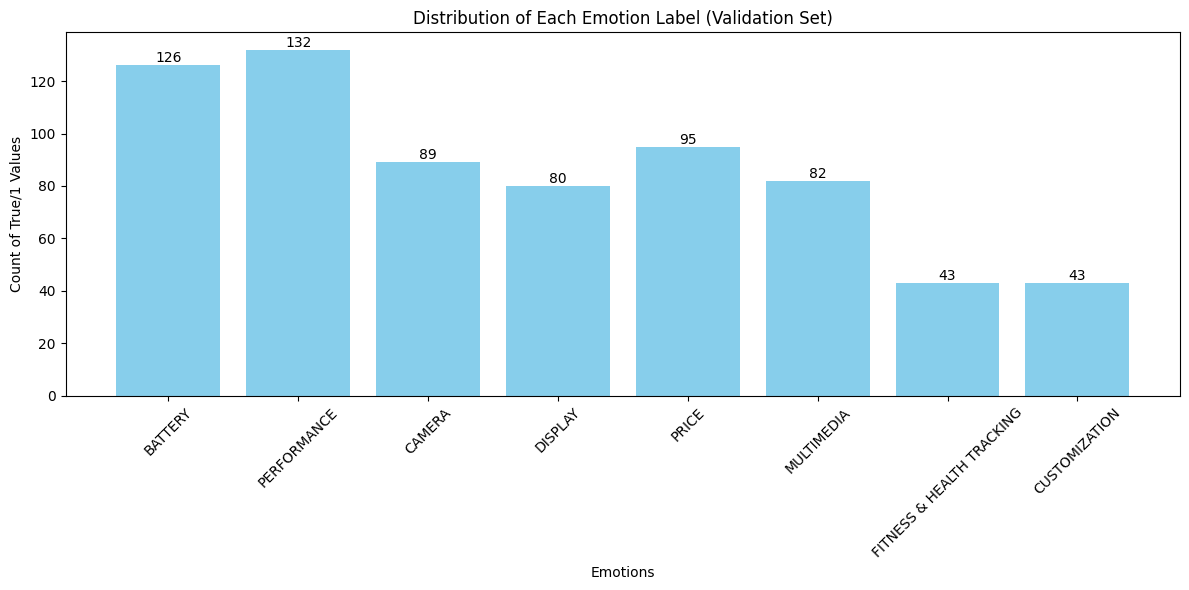

In [20]:
plot_emotion_distribution(df_valid, 'Validation Set')

In [21]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (1573, 9), Test: (337, 9), Valid: (338, 9)


In [22]:
# Hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
EPOCHS = 150
LEARNING_RATE = 1e-05
THRESHOLD = 0.4  # threshold for the sigmoid
LOSS_THRESHOLD = 0.02

In [2]:
# from transformers import RobertaTokenizer, RobertaModel, DistilBertTokenizer # Import DistilBertTokenizer

In [23]:
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [92]:
# Test the tokenizer
test_text = "We are testing BERT tokenizer."
# generate encodings
encodings = tokenizer.encode_plus(test_text,
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length",
                                  return_attention_mask = True,
                                  return_tensors = "pt")
# we get a dictionary with three keys (see: https://huggingface.co/transformers/glossary.html)
encodings

{'input_ids': tensor([[  101,  2057,  2024,  5604, 14324, 19204, 17629,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

In [93]:
df_train['Reviews']

,Reviews
340,Its good phone however like other Redmi phone ...
987,I really love the action button and the flat s...
773,This watch wa great for the price I paid the o...
609,It can last a little over a day and a half dep...
1783,Phone camera not good quality it look mega pix...
...,...
736,I am overall very happy with the mm Watch it i...
927,Battery is the worse battery I have ever exper...
1317,I read the review and wa hopeful the product w...
2004,in question the manufacturer comment that if h...


In [94]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.texts = list(df['Reviews'])  # Ubah 'title' ke 'texts' agar lebih deskriptif
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        text = " ".join(text.split())  # Membersihkan whitespace berlebih

        inputs = self.tokenizer.encode_plus(
            text,  # Tidak perlu `.lower()` karena RoBERTa case-sensitive
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'Reviews': text  # Ubah 'title' ke 'text' agar lebih sesuai
        }


In [95]:
target_list = list(df.columns)
target_list

['Reviews',
 'BATTERY',
 'PERFORMANCE',
 'CAMERA',
 'DISPLAY',
 'PRICE',
 'MULTIMEDIA',
 'FITNESS & HEALTH TRACKING',
 'CUSTOMIZATION']

In [96]:
target_list = target_list[1:]

In [97]:
target_list

['BATTERY',
 'PERFORMANCE',
 'CAMERA',
 'DISPLAY',
 'PRICE',
 'MULTIMEDIA',
 'FITNESS & HEALTH TRACKING',
 'CUSTOMIZATION']

In [98]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [99]:
next(iter(train_dataset))

{'input_ids': tensor([  101,  2049,  2204,  3042,  2174,  2066,  2060,  2417,  4328,  3042,
          2009,  2036,  5292, 10808,  3277,  4950, 10067,  2003,  2204,  3898,
          5813,  2003,  2036,  7929,  4082,  3177,  2003,  3435,  1998,  2064,
          2224,  2200, 12128,  3452,  1037,  2204,  3042,   102,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [101]:
# Data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [33]:
# from transformers import DistilBertModel, DistilBertTokenizer

# # Change tokenizer and model to DistilBERT
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# # If you want to use standard BERT, you can use 'bert-base-uncased' instead.
# model_class = DistilBertModel  # You can switch this to BertModel if you want full BERT instead of DistilBERT

# class DistilBERTClass(torch.nn.Module):
#     def __init__(self):
#         super(DistilBERTClass, self).__init__()
#         self.distilbert_model = DistilBertModel.from_pretrained('distilbert-base-uncased', return_dict=True)
#         self.dropout = torch.nn.Dropout(0.3)
#         self.linear = torch.nn.Linear(768, 8)  # 768 is the hidden size for DistilBERT, and 8 is for the emotions

#     def forward(self, input_ids, attn_mask):
#         output = self.distilbert_model(input_ids, attention_mask=attn_mask)
#         output_dropout = self.dropout(output.last_hidden_state[:, 0, :])  # Use [CLS] token embedding
#         output = self.linear(output_dropout)
#         return output

# # Initialize the model
# model = DistilBERTClass()
# model.to(device)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBERTClass(
  (distilbert_model): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (l

Using BERT instead of DistilBERT:


In [102]:
from transformers import BertModel, BertTokenizer

# Use BERT instead of DistilBERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 8)

    def forward(self, input_ids, attn_mask):
        output = self.bert_model(input_ids, attention_mask=attn_mask)
        output_dropout = self.dropout(output.last_hidden_state[:, 0, :])  # Use [CLS] token embedding
        output = self.linear(output_dropout)
        return output

# Initialize the model
model = BERTClass()
model.to(device)


BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [103]:
# BCEWithLogitsLoss combines a Sigmoid layer and the BCELoss in one single class.
# This version is more numerically stable than using a plain Sigmoid followed
# by a BCELoss as, by combining the operations into one layer,
# we take advantage of the log-sum-exp trick for numerical stability.
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [104]:

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [105]:
# Training of the model for one epoch
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0

    # Set model to training mode (activate dropout, batch norm)
    model.train()

    # Initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                    leave=True, colour='steelblue')

    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype=torch.long)
        mask = data['attention_mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)

        # Forward pass
        outputs = model(ids, mask)  # No token_type_ids for RoBERTa
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())

        # Compute accuracy
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs == targets)
        num_samples += targets.size

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # Update progress bar
        loop.set_postfix(batch_loss=loss.item())

    # Returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions) / num_samples, np.mean(losses)


In [106]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)

            outputs = model(ids, mask)
            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs==targets)
            num_samples += targets.size   # total number of elements in the 2D array

    return float(correct_predictions)/num_samples, np.mean(losses)

In [107]:
content = "/content"
output_dir = os.path.join(content, "output")
os.makedirs(output_dir, exist_ok=True)


In [ ]:
from collections import defaultdict
import torch
import os

history = defaultdict(list)
best_model_state = None
best_val_loss = float('inf')
best_epoch = 0
patience = 3  # Bisa disesuaikan
no_improve_count = 0

for epoch in range(1, EPOCHS + 1):
    print(f'Epoch {epoch}/{EPOCHS}')

    # Train the model for one epoch
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)

    # Validate the model
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    # Log the results
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # Check if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        best_epoch = epoch
        no_improve_count = 0
    else:
        no_improve_count += 1
        if no_improve_count >= patience:
            print(f"Stopping early at epoch {epoch}, best model at epoch {best_epoch} with val_loss={best_val_loss:.4f}")
            break

    # Early stopping based on absolute loss threshold
    if train_loss <= LOSS_THRESHOLD or val_loss <= LOSS_THRESHOLD:
        print(f"Stopping early as loss reached the threshold of {LOSS_THRESHOLD:.2f}")
        break

# Save the best model
if best_model_state:
    torch.save(best_model_state, os.path.join(output_dir, "multilabel_emotion_plusgpt_roberta.bin"))
    print(f"Best model saved from epoch {best_epoch} with val_loss={best_val_loss:.4f}")


Epoch 1/150


  0%|          | 0/50 [00:00<?, ?it/s]

train_loss=0.5417, val_loss=0.4743 train_acc=0.7444, val_acc=0.7833
Epoch 2/150


  0%|          | 0/50 [00:00<?, ?it/s]

train_loss=0.4418, val_loss=0.3912 train_acc=0.8054, val_acc=0.8299
Epoch 3/150


  0%|          | 0/50 [00:00<?, ?it/s]

train_loss=0.3696, val_loss=0.3412 train_acc=0.8490, val_acc=0.8587
Epoch 4/150


  0%|          | 0/50 [00:00<?, ?it/s]

train_loss=0.3177, val_loss=0.3002 train_acc=0.8787, val_acc=0.8883
Epoch 5/150


  0%|          | 0/50 [00:00<?, ?it/s]

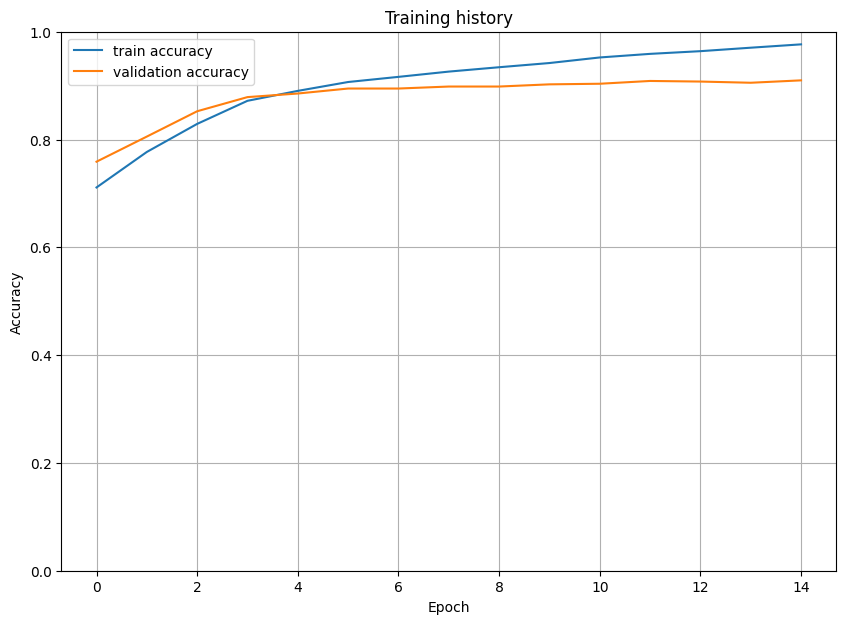

In [40]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);
plt.grid()


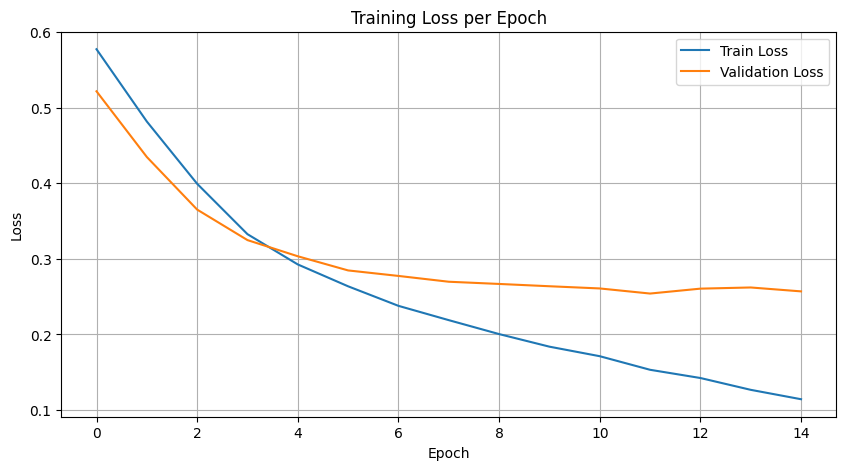

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [67]:
# Loading pretrained model (best model)
model = DistilBERTClass()
model.load_state_dict(torch.load(os.path.join(output_dir,"multilabel_emotion_plusgpt_roberta.bin")))
model = model.to(device)

In [68]:
test_acc, test_loss = eval_model(test_data_loader, model, optimizer)

In [69]:
test_acc

0.9020771513353115

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
def get_predictions(model, data_loader):
    """
    Outputs:
      predictions - Model predictions
      prediction_probs - Probabilities from sigmoid function
      target_values - Ground truth labels
    """
    model.eval()  # Set model ke mode evaluasi

    Reviews = []  # Mengganti 'title' menjadi 'text'
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
        for data in data_loader:
            text = data["Reviews"]  # Mengambil teks dari dataset, using "Reviews" instead of "text"
            ids = data["input_ids"].to(device, dtype=torch.long)
            mask = data["attention_mask"].to(device, dtype=torch.long)
            targets = data["targets"].to(device, dtype=torch.float)

            outputs = model(ids, mask)  # RoBERTa tidak menggunakan token_type_ids
            outputs = torch.sigmoid(outputs).detach().cpu()  # Tambahkan sigmoid untuk multi-label classification

            preds = outputs.round()  # Binarisasi output menjadi 0/1
            targets = targets.detach().cpu()

            Reviews.extend([text])  # Menyimpan teks, using "Reviews" instead of "texts" and ensuring it's a list
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            target_values.extend(targets)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)

    return Reviews, predictions, prediction_probs, target_values  # Mengembalikan texts sebagai pengganti title

In [72]:
texts, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

In [73]:
predictions.numpy()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
print(f"titles:{len(texts)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:11 
predictions:torch.Size([337, 8]) 
prediction_probs:torch.Size([337, 8]) 
target_values:torch.Size([337, 8])


In [75]:
print(classification_report(target_values, predictions, target_names=target_list))

                           precision    recall  f1-score   support

                  BATTERY       0.97      0.86      0.91       133
              PERFORMANCE       0.70      0.67      0.68       115
                   CAMERA       0.93      0.84      0.88        89
                  DISPLAY       0.80      0.74      0.77        95
                    PRICE       0.85      0.74      0.79        76
               MULTIMEDIA       0.77      0.71      0.74        62
FITNESS & HEALTH TRACKING       0.86      0.69      0.77        45
            CUSTOMIZATION       0.53      0.34      0.42        29

                micro avg       0.83      0.74      0.78       644
                macro avg       0.80      0.70      0.74       644
             weighted avg       0.83      0.74      0.78       644
              samples avg       0.73      0.67      0.68       644



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
raw_text ="The Xiaomi Redmi Note Pro is fantastic Its sleek design and powerful performance make it a joy to use The robust processor and ample RAM handle multitasking effortlessly The stunning AMOLED display delivers vibrant color and sharp detail perfect for watching video and browsing The longlasting battery and fast charging are super convenient The versatile camera system capture excellent photo Great value for the price."

In [77]:
encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    padding='max_length',  # RoBERTa-style padding
    truncation=True,  # Memastikan teks tidak melebihi max_length
    return_attention_mask=True,
    return_tensors='pt'
)

In [78]:
input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)

# Pemanggilan model tanpa token_type_ids
output = model(input_ids, attention_mask)

# Add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
output = torch.sigmoid(output).detach().cpu()

# Thresholding at 0.5
output = output.flatten().round().numpy()
output

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [79]:
print(f"Title: {raw_text}")
for idx, p in enumerate(output):
  if p==1:
    print(f"Label: {target_list[idx]}")

Title: The Xiaomi Redmi Note Pro is fantastic Its sleek design and powerful performance make it a joy to use The robust processor and ample RAM handle multitasking effortlessly The stunning AMOLED display delivers vibrant color and sharp detail perfect for watching video and browsing The longlasting battery and fast charging are super convenient The versatile camera system capture excellent photo Great value for the price.
Label: BATTERY
Label: PERFORMANCE
Label: CAMERA
Label: DISPLAY
Label: PRICE


In [80]:
output = model(input_ids, attention_mask)  # Hapus token_type_ids
output = torch.sigmoid(output).detach().cpu()

In [81]:
probabilities = output.flatten().numpy()
probabilities_percentage = probabilities * 100

In [82]:
emotion_predictions = list(zip(target_list, probabilities_percentage))
emotion_predictions_sorted = sorted(emotion_predictions, key=lambda x: x[1], reverse=True)

In [83]:
print(f"Title: {raw_text}\n")
print("Predicted Emotion Probabilities:\n")
for emotion, prob in emotion_predictions_sorted:
    print(f"{emotion}: {prob:.2f}%")

Title: The Xiaomi Redmi Note Pro is fantastic Its sleek design and powerful performance make it a joy to use The robust processor and ample RAM handle multitasking effortlessly The stunning AMOLED display delivers vibrant color and sharp detail perfect for watching video and browsing The longlasting battery and fast charging are super convenient The versatile camera system capture excellent photo Great value for the price.

Predicted Emotion Probabilities:

CAMERA: 98.58%
PERFORMANCE: 97.90%
PRICE: 97.34%
DISPLAY: 92.03%
BATTERY: 89.78%
MULTIMEDIA: 9.49%
CUSTOMIZATION: 5.85%
FITNESS & HEALTH TRACKING: 2.76%


In [84]:
from google.colab import files
model_path = os.path.join(output_dir, "multilabel_emotion_plusgpt_roberta.bin")
def download_model(model_path):
    if os.path.exists(model_path):
        files.download(model_path)
        print("Model downloaded successfully!")
    else:
        print("Model file not found!")

# Panggil fungsi download setelah training selesai
download_model(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model downloaded successfully!


Confusion Matrix for BATTERY


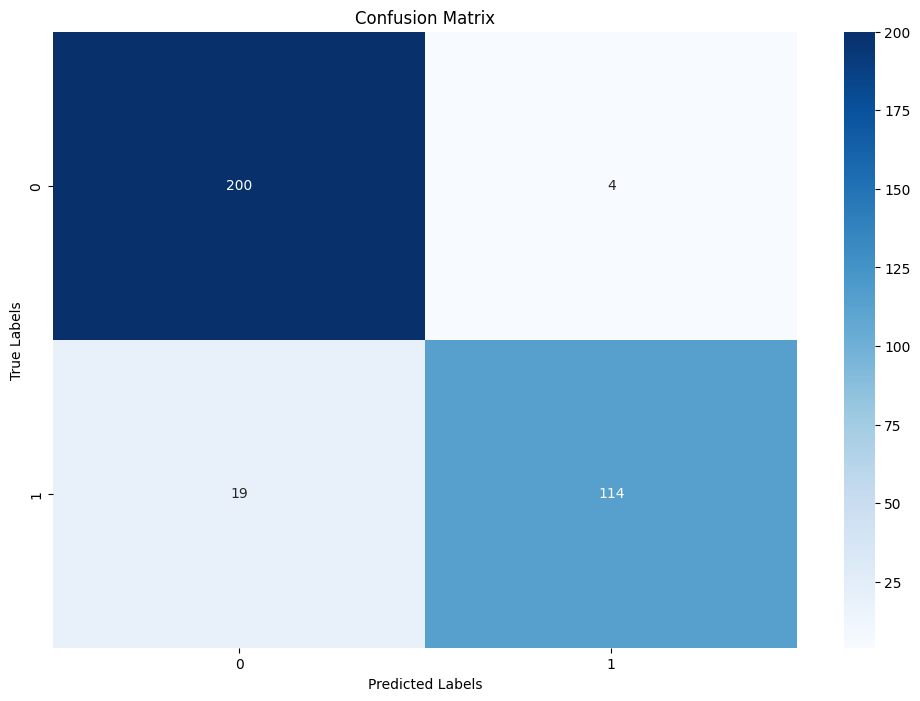

Confusion Matrix for PERFORMANCE


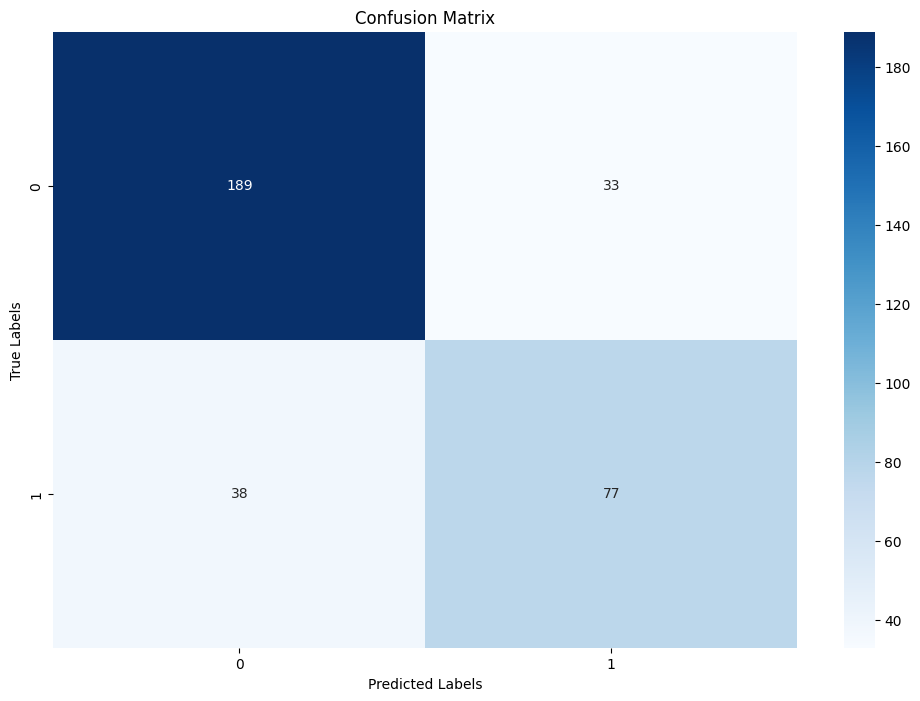

Confusion Matrix for CAMERA


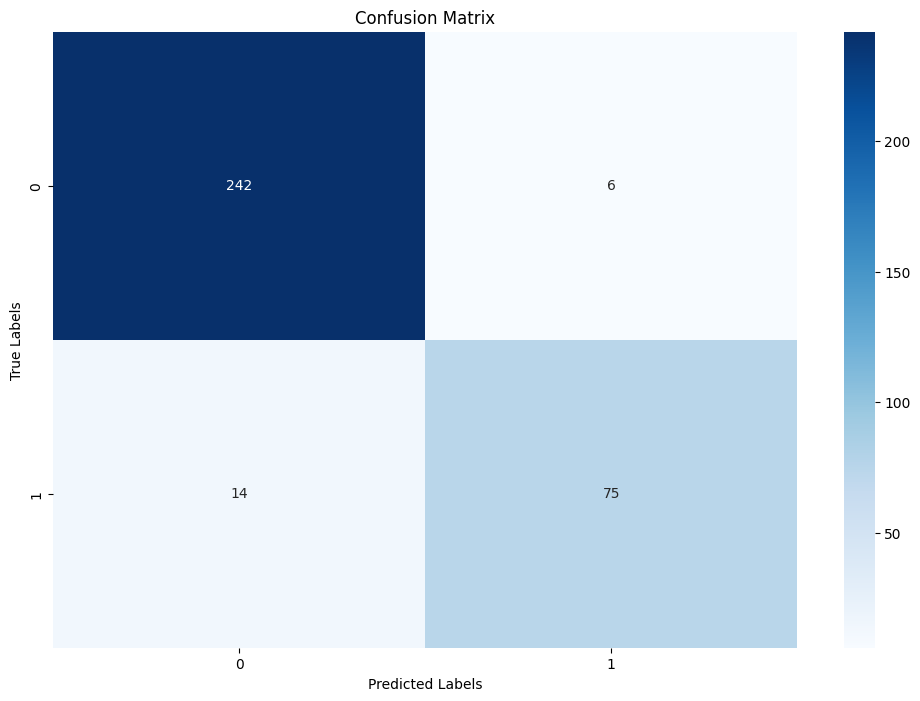

Confusion Matrix for DISPLAY


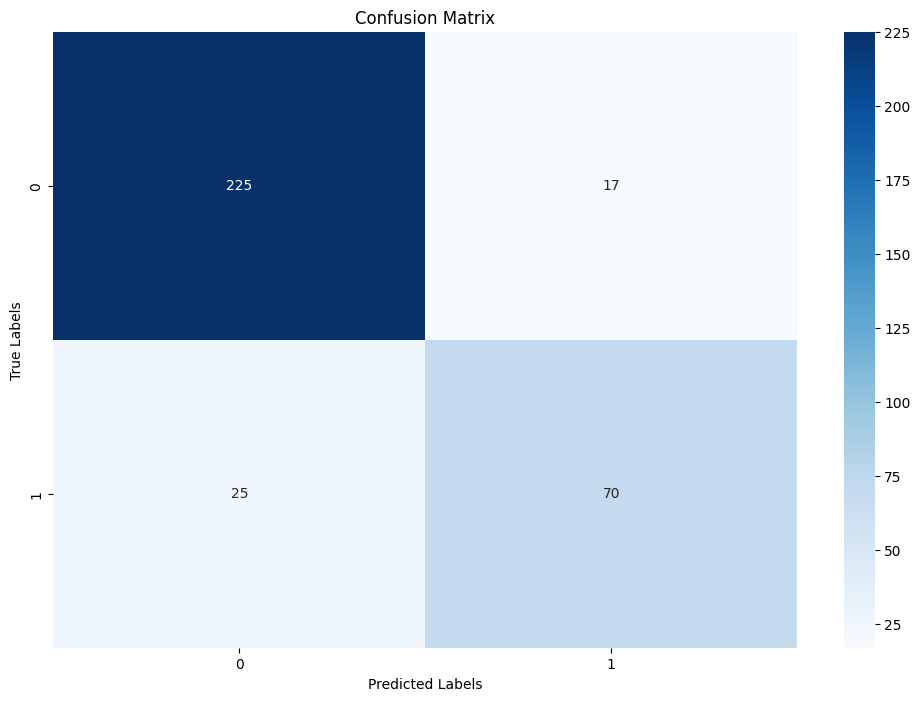

Confusion Matrix for PRICE


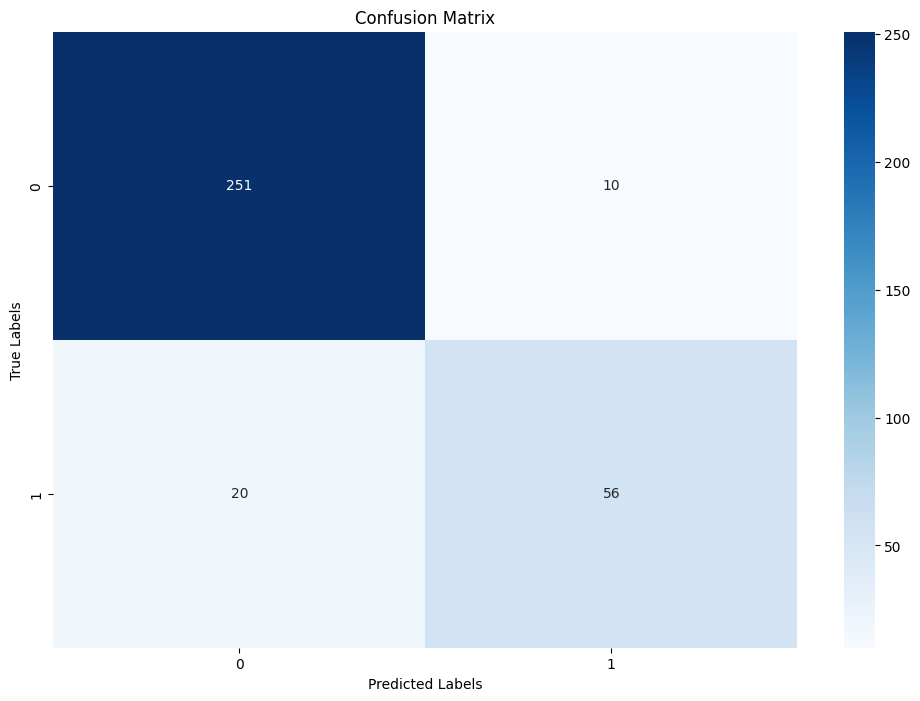

Confusion Matrix for MULTIMEDIA


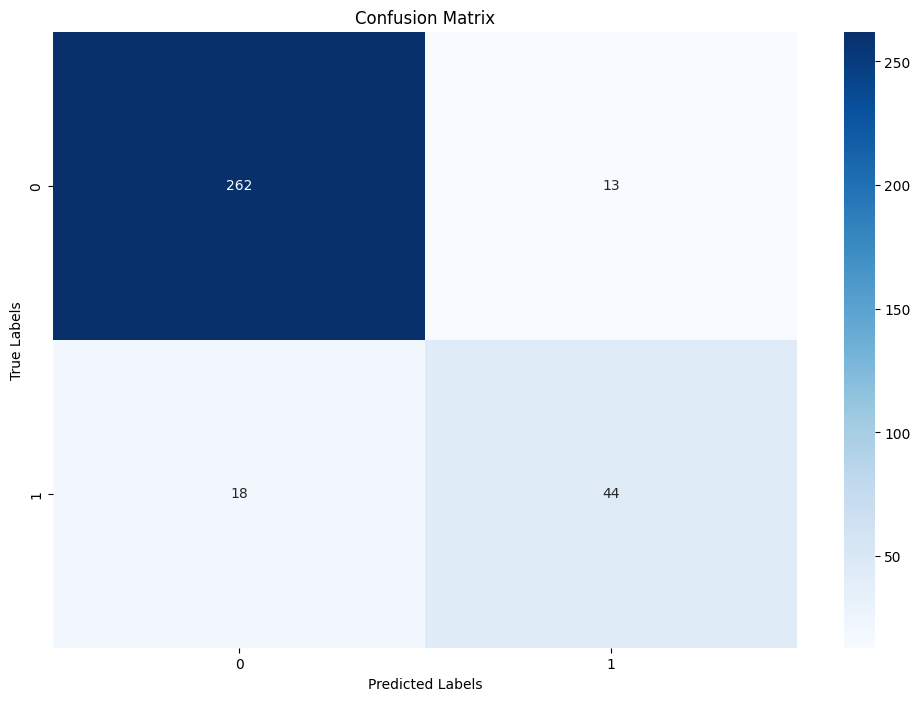

Confusion Matrix for FITNESS & HEALTH TRACKING


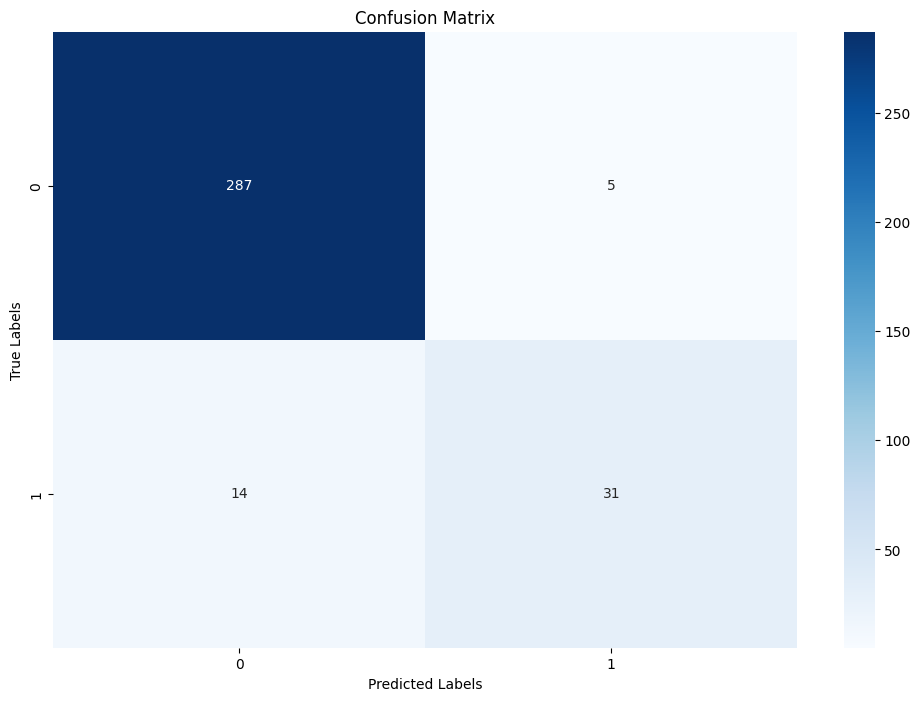

Confusion Matrix for CUSTOMIZATION


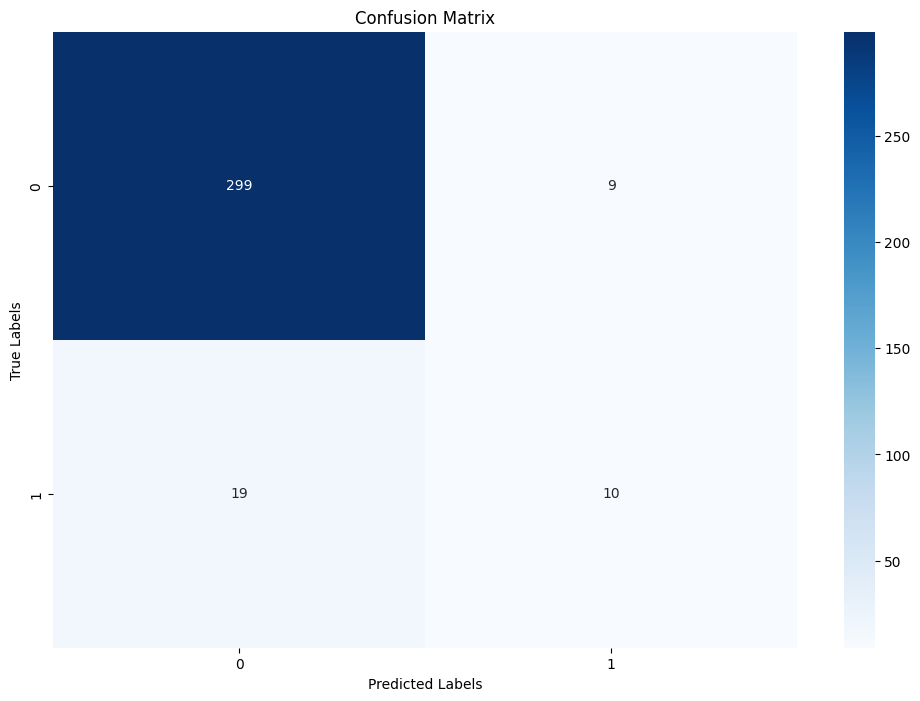

titles:11 
predictions:torch.Size([337, 8]) 
prediction_probs:torch.Size([337, 8]) 
target_values:torch.Size([337, 8])
                           precision    recall  f1-score   support

                  BATTERY       0.97      0.86      0.91       133
              PERFORMANCE       0.70      0.67      0.68       115
                   CAMERA       0.93      0.84      0.88        89
                  DISPLAY       0.80      0.74      0.77        95
                    PRICE       0.85      0.74      0.79        76
               MULTIMEDIA       0.77      0.71      0.74        62
FITNESS & HEALTH TRACKING       0.86      0.69      0.77        45
            CUSTOMIZATION       0.53      0.34      0.42        29

                micro avg       0.83      0.74      0.78       644
                macro avg       0.80      0.70      0.74       644
             weighted avg       0.83      0.74      0.78       644
              samples avg       0.73      0.67      0.68       644



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

# Convert tensors to numpy arrays
y_true = target_values.numpy()
y_pred = predictions.numpy()

# Plot confusion matrix for each emotion label
for i, label in enumerate(target_list):
    print(f'Confusion Matrix for {label}')
    plot_confusion_matrix(y_true[:, i], y_pred[:, i], labels=[0, 1])

print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")
print(classification_report(target_values, predictions, target_names=target_list))


1. Save the Confusion Matrix for Each Emotion:


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def save_confusion_matrix(y_true, y_pred, labels, label_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {label_name}')
    plt.tight_layout()
    confusion_matrix_filename = f"confusion_matrix_{label_name}.png"
    plt.savefig(confusion_matrix_filename)
    plt.close()

# Save confusion matrix for each emotion
for i, label in enumerate(target_list):
    save_confusion_matrix(y_true[:, i], y_pred[:, i], labels=[0, 1], label_name=label)


2. Save the Training and Validation Accuracy/Loss Plots:


In [87]:
# After the training is finished
plt.rcParams["figure.figsize"] = (10, 7)

# Training accuracy vs Validation accuracy plot
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1])
plt.grid()
plt.savefig('training_vs_validation_accuracy.png')  # Save plot as PNG file
plt.close()

# Training loss vs Validation loss plot
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.savefig('training_vs_validation_loss.png')  # Save plot as PNG file
plt.close()


3. Save the Best Model Weights:


In [88]:
# After training finishes (best model saved)
best_model_path = os.path.join(output_dir, "best_multilabel_emotion_model.bin")
torch.save(best_model_state, best_model_path)
print(f"Best model saved at: {best_model_path}")


Best model saved at: /content/output/best_multilabel_emotion_model.bin


4. Save the Classification Report (for Test Model):


In [89]:
from sklearn.metrics import classification_report

# Get predictions for test set
test_texts, test_predictions, test_prediction_probs, test_target_values = get_predictions(model, test_data_loader)

# Get the classification report
classification_report_str = classification_report(test_target_values, test_predictions, target_names=target_list)

# Save the classification report to a text file
with open('classification_report_test_model.txt', 'w') as f:
    f.write(classification_report_str)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Save the Results of the Test Model:
